###### Wheater - prediction , Madrid


In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
from matplotlib import pylab
import seaborn as sns

###### DATASET LOAD

In [2]:
Dataset=pd.read_csv('D:\Python projects\DATA_WEATHE_MADRID\clima2022.csv',sep=';')

In [3]:
Dataset

,provincia,municipio,estacion,magnitud,punto_muestreo,ano,mes,dia,h01,v01,...,h20,v20,h21,v21,h22,v22,h23,v23,h24,v24
0,28,102,1,81,28102001_81_89,2022,1,1,"2,1",V,...,"1,4",V,"1,6",V,"1,7",V,"1,8",V,"1,5",V
1,28,102,1,82,28102001_82_89,2022,1,1,"38,0",V,...,"61,0",V,"78,0",V,"67,0",V,"57,0",V,"71,0",V
2,28,102,1,83,28102001_83_89,2022,1,1,"7,2",V,...,"11,3",V,"10,6",V,"9,7",V,"9,2",V,"9,1",V
3,28,102,1,86,28102001_86_89,2022,1,1,"68,0",V,...,"64,0",V,"64,0",V,"66,0",V,"67,0",V,"64,0",V
4,28,102,1,87,28102001_87_89,2022,1,1,"935,0",V,...,"935,0",V,"934,0",V,"935,0",V,"935,0",V,"935,0",V
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
61301,28,92,5,83,28092005_83_89,2022,12,31,"7,4",V,...,"9,4",V,"7,7",V,"8,0",V,"7,3",V,"8,0",V
61302,28,92,5,86,28092005_86_89,2022,12,31,"75,0",V,...,"59,0",V,"65,0",V,"64,0",V,"69,0",V,"65,0",V
61303,28,92,5,87,28092005_87_89,2022,12,31,"954,0",V,...,"952,0",V,"953,0",V,"953,0",V,"953,0",V,"953,0",V
61304,28,92,5,88,28092005_88_89,2022,12,31,"2,0",V,...,"2,0",V,"2,0",V,"2,0",V,"2,0",V,"2,0",V


In [4]:
Dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 61306 entries, 0 to 61305
Data columns (total 56 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   provincia       61306 non-null  int64 
 1   municipio       61306 non-null  int64 
 2   estacion        61306 non-null  int64 
 3   magnitud        61306 non-null  int64 
 4   punto_muestreo  61306 non-null  object
 5   ano             61306 non-null  int64 
 6   mes             61306 non-null  int64 
 7   dia             61306 non-null  int64 
 8   h01             61094 non-null  object
 9   v01             61306 non-null  object
 10  h02             61076 non-null  object
 11  v02             61306 non-null  object
 12  h03             61064 non-null  object
 13  v03             61306 non-null  object
 14  h04             60996 non-null  object
 15  v04             61306 non-null  object
 16  h05             60961 non-null  object
 17  v05             61306 non-null  object
 18  h06   

In [5]:
select_temperature = Dataset['magnitud'] == 83

In [6]:
Dataset_temperature = Dataset[select_temperature]

In [7]:
Dataset_temperature

,provincia,municipio,estacion,magnitud,punto_muestreo,ano,mes,dia,h01,v01,...,h20,v20,h21,v21,h22,v22,h23,v23,h24,v24
2,28,102,1,83,28102001_83_89,2022,1,1,"7,2",V,...,"11,3",V,"10,6",V,"9,7",V,"9,2",V,"9,1",V
9,28,120,1,83,28120001_83_89,2022,1,1,"9,3",V,...,"9,6",V,"10,0",V,"10,1",V,"9,5",V,"9,4",V
16,28,123,2,83,28123002_83_89,2022,1,1,"7,2",V,...,"11,0",V,"9,9",V,"9,8",V,"8,9",V,"8,2",V
23,28,13,2,83,28013002_83_89,2022,1,1,"3,1",V,...,"8,3",V,"6,8",V,"5,6",V,"4,9",V,"4,5",V
30,28,133,2,83,28133002_83_89,2022,1,1,"5,1",V,...,"9,9",V,"8,6",V,"8,2",V,"6,3",V,"5,6",V
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
61273,28,7,4,83,28007004_83_89,2022,12,31,"8,9",V,...,"11,9",V,"11,0",V,"10,6",V,"10,1",V,"9,9",V
61280,28,74,7,83,28074007_83_89,2022,12,31,"8,0",V,...,"8,5",V,"7,7",V,"6,9",V,"6,4",V,"6,3",V
61287,28,80,3,83,28080003_83_89,2022,12,31,"7,2",V,...,"8,6",V,"8,9",V,"7,5",V,"7,5",V,"7,8",V
61294,28,9,1,83,28009001_83_89,2022,12,31,"7,0",V,...,"9,2",V,"7,1",V,"8,7",V,"6,6",V,"7,1",V


In [8]:
Dataset_temperature.isna().sum()

provincia          0
municipio          0
estacion           0
magnitud           0
punto_muestreo     0
ano                0
mes                0
dia                0
h01               29
v01                0
h02               33
v02                0
h03               34
v03                0
h04               43
v04                0
h05               48
v05                0
h06               56
v06                0
h07               63
v07                0
h08               70
v08                0
h09               72
v09                0
h10               77
v10                0
h11               62
v11                0
h12               57
v12                0
h13               43
v13                0
h14               32
v14                0
h15               27
v15                0
h16               20
v16                0
h17               16
v17                0
h18               16
v18                0
h19               20
v19                0
h20               23
v20          

In [9]:
#Dataset_temperature=Dataset_temperature.drop(['promclima'], axis=1)

In [10]:
Dataset_temperature

,provincia,municipio,estacion,magnitud,punto_muestreo,ano,mes,dia,h01,v01,...,h20,v20,h21,v21,h22,v22,h23,v23,h24,v24
2,28,102,1,83,28102001_83_89,2022,1,1,"7,2",V,...,"11,3",V,"10,6",V,"9,7",V,"9,2",V,"9,1",V
9,28,120,1,83,28120001_83_89,2022,1,1,"9,3",V,...,"9,6",V,"10,0",V,"10,1",V,"9,5",V,"9,4",V
16,28,123,2,83,28123002_83_89,2022,1,1,"7,2",V,...,"11,0",V,"9,9",V,"9,8",V,"8,9",V,"8,2",V
23,28,13,2,83,28013002_83_89,2022,1,1,"3,1",V,...,"8,3",V,"6,8",V,"5,6",V,"4,9",V,"4,5",V
30,28,133,2,83,28133002_83_89,2022,1,1,"5,1",V,...,"9,9",V,"8,6",V,"8,2",V,"6,3",V,"5,6",V
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
61273,28,7,4,83,28007004_83_89,2022,12,31,"8,9",V,...,"11,9",V,"11,0",V,"10,6",V,"10,1",V,"9,9",V
61280,28,74,7,83,28074007_83_89,2022,12,31,"8,0",V,...,"8,5",V,"7,7",V,"6,9",V,"6,4",V,"6,3",V
61287,28,80,3,83,28080003_83_89,2022,12,31,"7,2",V,...,"8,6",V,"8,9",V,"7,5",V,"7,5",V,"7,8",V
61294,28,9,1,83,28009001_83_89,2022,12,31,"7,0",V,...,"9,2",V,"7,1",V,"8,7",V,"6,6",V,"7,1",V


In [11]:
Data_practice = Dataset_temperature

In [12]:
Data_practice

,provincia,municipio,estacion,magnitud,punto_muestreo,ano,mes,dia,h01,v01,...,h20,v20,h21,v21,h22,v22,h23,v23,h24,v24
2,28,102,1,83,28102001_83_89,2022,1,1,"7,2",V,...,"11,3",V,"10,6",V,"9,7",V,"9,2",V,"9,1",V
9,28,120,1,83,28120001_83_89,2022,1,1,"9,3",V,...,"9,6",V,"10,0",V,"10,1",V,"9,5",V,"9,4",V
16,28,123,2,83,28123002_83_89,2022,1,1,"7,2",V,...,"11,0",V,"9,9",V,"9,8",V,"8,9",V,"8,2",V
23,28,13,2,83,28013002_83_89,2022,1,1,"3,1",V,...,"8,3",V,"6,8",V,"5,6",V,"4,9",V,"4,5",V
30,28,133,2,83,28133002_83_89,2022,1,1,"5,1",V,...,"9,9",V,"8,6",V,"8,2",V,"6,3",V,"5,6",V
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
61273,28,7,4,83,28007004_83_89,2022,12,31,"8,9",V,...,"11,9",V,"11,0",V,"10,6",V,"10,1",V,"9,9",V
61280,28,74,7,83,28074007_83_89,2022,12,31,"8,0",V,...,"8,5",V,"7,7",V,"6,9",V,"6,4",V,"6,3",V
61287,28,80,3,83,28080003_83_89,2022,12,31,"7,2",V,...,"8,6",V,"8,9",V,"7,5",V,"7,5",V,"7,8",V
61294,28,9,1,83,28009001_83_89,2022,12,31,"7,0",V,...,"9,2",V,"7,1",V,"8,7",V,"6,6",V,"7,1",V


In [13]:
Data_practice

,provincia,municipio,estacion,magnitud,punto_muestreo,ano,mes,dia,h01,v01,...,h20,v20,h21,v21,h22,v22,h23,v23,h24,v24
2,28,102,1,83,28102001_83_89,2022,1,1,"7,2",V,...,"11,3",V,"10,6",V,"9,7",V,"9,2",V,"9,1",V
9,28,120,1,83,28120001_83_89,2022,1,1,"9,3",V,...,"9,6",V,"10,0",V,"10,1",V,"9,5",V,"9,4",V
16,28,123,2,83,28123002_83_89,2022,1,1,"7,2",V,...,"11,0",V,"9,9",V,"9,8",V,"8,9",V,"8,2",V
23,28,13,2,83,28013002_83_89,2022,1,1,"3,1",V,...,"8,3",V,"6,8",V,"5,6",V,"4,9",V,"4,5",V
30,28,133,2,83,28133002_83_89,2022,1,1,"5,1",V,...,"9,9",V,"8,6",V,"8,2",V,"6,3",V,"5,6",V
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
61273,28,7,4,83,28007004_83_89,2022,12,31,"8,9",V,...,"11,9",V,"11,0",V,"10,6",V,"10,1",V,"9,9",V
61280,28,74,7,83,28074007_83_89,2022,12,31,"8,0",V,...,"8,5",V,"7,7",V,"6,9",V,"6,4",V,"6,3",V
61287,28,80,3,83,28080003_83_89,2022,12,31,"7,2",V,...,"8,6",V,"8,9",V,"7,5",V,"7,5",V,"7,8",V
61294,28,9,1,83,28009001_83_89,2022,12,31,"7,0",V,...,"9,2",V,"7,1",V,"8,7",V,"6,6",V,"7,1",V


In [14]:
for i in range(0, len(Data_practice.columns),2):
    horas= Data_practice.iloc[:,8:i+2]
    print(horas.head(), "\n")

Empty DataFrame
Columns: []
Index: [2, 9, 16, 23, 30] 

Empty DataFrame
Columns: []
Index: [2, 9, 16, 23, 30] 

Empty DataFrame
Columns: []
Index: [2, 9, 16, 23, 30] 

Empty DataFrame
Columns: []
Index: [2, 9, 16, 23, 30] 

    h01 v01
2   7,2   V
9   9,3   V
16  7,2   V
23  3,1   V
30  5,1   V 

    h01 v01  h02 v02
2   7,2   V  6,4   V
9   9,3   V  9,1   V
16  7,2   V  6,4   V
23  3,1   V  2,3   V
30  5,1   V  4,3   V 

    h01 v01  h02 v02  h03 v03
2   7,2   V  6,4   V  6,3   V
9   9,3   V  9,1   V  8,7   V
16  7,2   V  6,4   V  6,0   V
23  3,1   V  2,3   V  1,8   V
30  5,1   V  4,3   V  3,9   V 

    h01 v01  h02 v02  h03 v03  h04 v04
2   7,2   V  6,4   V  6,3   V  6,0   V
9   9,3   V  9,1   V  8,7   V  8,2   V
16  7,2   V  6,4   V  6,0   V  4,9   V
23  3,1   V  2,3   V  1,8   V  1,1   V
30  5,1   V  4,3   V  3,9   V  3,2   V 

    h01 v01  h02 v02  h03 v03  h04 v04  h05 v05
2   7,2   V  6,4   V  6,3   V  6,0   V  5,3   V
9   9,3   V  9,1   V  8,7   V  8,2   V  8,3   V
16  7,2   V 

In [15]:
horas 

,h01,v01,h02,v02,h03,v03,h04,v04,h05,v05,...,h20,v20,h21,v21,h22,v22,h23,v23,h24,v24
2,"7,2",V,"6,4",V,"6,3",V,"6,0",V,"5,3",V,...,"11,3",V,"10,6",V,"9,7",V,"9,2",V,"9,1",V
9,"9,3",V,"9,1",V,"8,7",V,"8,2",V,"8,3",V,...,"9,6",V,"10,0",V,"10,1",V,"9,5",V,"9,4",V
16,"7,2",V,"6,4",V,"6,0",V,"4,9",V,"5,0",V,...,"11,0",V,"9,9",V,"9,8",V,"8,9",V,"8,2",V
23,"3,1",V,"2,3",V,"1,8",V,"1,1",V,"0,8",V,...,"8,3",V,"6,8",V,"5,6",V,"4,9",V,"4,5",V
30,"5,1",V,"4,3",V,"3,9",V,"3,2",V,"3,0",V,...,"9,9",V,"8,6",V,"8,2",V,"6,3",V,"5,6",V
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
61273,"8,9",V,"8,8",V,"8,4",V,"7,9",V,"7,4",V,...,"11,9",V,"11,0",V,"10,6",V,"10,1",V,"9,9",V
61280,"8,0",V,"6,1",V,"5,3",V,"4,9",V,"4,5",V,...,"8,5",V,"7,7",V,"6,9",V,"6,4",V,"6,3",V
61287,"7,2",V,"6,4",V,"6,0",V,"5,8",V,"5,6",V,...,"8,6",V,"8,9",V,"7,5",V,"7,5",V,"7,8",V
61294,"7,0",V,"6,6",V,"6,1",V,"5,8",V,"5,6",V,...,"9,2",V,"7,1",V,"8,7",V,"6,6",V,"7,1",V


In [16]:
horas.isna().sum()

h01    29
v01     0
h02    33
v02     0
h03    34
v03     0
h04    43
v04     0
h05    48
v05     0
h06    56
v06     0
h07    63
v07     0
h08    70
v08     0
h09    72
v09     0
h10    77
v10     0
h11    62
v11     0
h12    57
v12     0
h13    43
v13     0
h14    32
v14     0
h15    27
v15     0
h16    20
v16     0
h17    16
v17     0
h18    16
v18     0
h19    20
v19     0
h20    23
v20     0
h21    22
v21     0
h22    22
v22     0
h23    24
v23     0
h24    26
v24     0
dtype: int64

In [17]:
df_mean = horas

In [18]:
df_mean

,h01,v01,h02,v02,h03,v03,h04,v04,h05,v05,...,h20,v20,h21,v21,h22,v22,h23,v23,h24,v24
2,"7,2",V,"6,4",V,"6,3",V,"6,0",V,"5,3",V,...,"11,3",V,"10,6",V,"9,7",V,"9,2",V,"9,1",V
9,"9,3",V,"9,1",V,"8,7",V,"8,2",V,"8,3",V,...,"9,6",V,"10,0",V,"10,1",V,"9,5",V,"9,4",V
16,"7,2",V,"6,4",V,"6,0",V,"4,9",V,"5,0",V,...,"11,0",V,"9,9",V,"9,8",V,"8,9",V,"8,2",V
23,"3,1",V,"2,3",V,"1,8",V,"1,1",V,"0,8",V,...,"8,3",V,"6,8",V,"5,6",V,"4,9",V,"4,5",V
30,"5,1",V,"4,3",V,"3,9",V,"3,2",V,"3,0",V,...,"9,9",V,"8,6",V,"8,2",V,"6,3",V,"5,6",V
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
61273,"8,9",V,"8,8",V,"8,4",V,"7,9",V,"7,4",V,...,"11,9",V,"11,0",V,"10,6",V,"10,1",V,"9,9",V
61280,"8,0",V,"6,1",V,"5,3",V,"4,9",V,"4,5",V,...,"8,5",V,"7,7",V,"6,9",V,"6,4",V,"6,3",V
61287,"7,2",V,"6,4",V,"6,0",V,"5,8",V,"5,6",V,...,"8,6",V,"8,9",V,"7,5",V,"7,5",V,"7,8",V
61294,"7,0",V,"6,6",V,"6,1",V,"5,8",V,"5,6",V,...,"9,2",V,"7,1",V,"8,7",V,"6,6",V,"7,1",V


In [19]:
for i in range(0, len(horas.columns),2):
    df_mean= horas.iloc[:,0:i+2:2]

In [20]:
df_mean

,h01,h02,h03,h04,h05,h06,h07,h08,h09,h10,...,h15,h16,h17,h18,h19,h20,h21,h22,h23,h24
2,"7,2","6,4","6,3","6,0","5,3","4,5","3,8","4,6","7,2","10,4",...,"19,8","19,5","15,5","12,8","12,4","11,3","10,6","9,7","9,2","9,1"
9,"9,3","9,1","8,7","8,2","8,3","8,9","8,5","8,6","10,2","11,3",...,"13,6","12,5","11,3","9,5","9,5","9,6","10,0","10,1","9,5","9,4"
16,"7,2","6,4","6,0","4,9","5,0","4,7","4,7","4,0","5,7","8,3",...,"20,2","20,6","18,8","14,6","12,0","11,0","9,9","9,8","8,9","8,2"
23,"3,1","2,3","1,8","1,1","0,8","0,3","0,1","0,2","1,1","3,0",...,"17,8","18,3","17,3","12,7","10,4","8,3","6,8","5,6","4,9","4,5"
30,"5,1","4,3","3,9","3,2","3,0","2,3","1,5","1,9","4,2","5,7",...,"16,6","16,4","15,1","13,4","11,7","9,9","8,6","8,2","6,3","5,6"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
61273,"8,9","8,8","8,4","7,9","7,4","7,4","6,7","6,4","7,3","9,1",...,"14,5","15,1","13,8","12,4","12,0","11,9","11,0","10,6","10,1","9,9"
61280,"8,0","6,1","5,3","4,9","4,5","4,1","3,6","3,1","7,3","10,2",...,"15,5","15,1","13,2","10,0","8,9","8,5","7,7","6,9","6,4","6,3"
61287,"7,2","6,4","6,0","5,8","5,6","5,2","4,6","4,5","5,8","7,1",...,"13,1","13,6","12,6","10,8","9,7","8,6","8,9","7,5","7,5","7,8"
61294,"7,0","6,6","6,1","5,8","5,6","5,4","4,5","3,7","5,5","7,8",...,"12,2","12,5","11,9","10,5","9,7","9,2","7,1","8,7","6,6","7,1"


In [21]:
for i in range(0, len(df_mean.columns)):
    df_mean[df_mean.columns[i]] = df_mean[df_mean.columns[i]].astype(str)


C:\Users\franc\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [22]:
df_mean

,h01,h02,h03,h04,h05,h06,h07,h08,h09,h10,...,h15,h16,h17,h18,h19,h20,h21,h22,h23,h24
2,"7,2","6,4","6,3","6,0","5,3","4,5","3,8","4,6","7,2","10,4",...,"19,8","19,5","15,5","12,8","12,4","11,3","10,6","9,7","9,2","9,1"
9,"9,3","9,1","8,7","8,2","8,3","8,9","8,5","8,6","10,2","11,3",...,"13,6","12,5","11,3","9,5","9,5","9,6","10,0","10,1","9,5","9,4"
16,"7,2","6,4","6,0","4,9","5,0","4,7","4,7","4,0","5,7","8,3",...,"20,2","20,6","18,8","14,6","12,0","11,0","9,9","9,8","8,9","8,2"
23,"3,1","2,3","1,8","1,1","0,8","0,3","0,1","0,2","1,1","3,0",...,"17,8","18,3","17,3","12,7","10,4","8,3","6,8","5,6","4,9","4,5"
30,"5,1","4,3","3,9","3,2","3,0","2,3","1,5","1,9","4,2","5,7",...,"16,6","16,4","15,1","13,4","11,7","9,9","8,6","8,2","6,3","5,6"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
61273,"8,9","8,8","8,4","7,9","7,4","7,4","6,7","6,4","7,3","9,1",...,"14,5","15,1","13,8","12,4","12,0","11,9","11,0","10,6","10,1","9,9"
61280,"8,0","6,1","5,3","4,9","4,5","4,1","3,6","3,1","7,3","10,2",...,"15,5","15,1","13,2","10,0","8,9","8,5","7,7","6,9","6,4","6,3"
61287,"7,2","6,4","6,0","5,8","5,6","5,2","4,6","4,5","5,8","7,1",...,"13,1","13,6","12,6","10,8","9,7","8,6","8,9","7,5","7,5","7,8"
61294,"7,0","6,6","6,1","5,8","5,6","5,4","4,5","3,7","5,5","7,8",...,"12,2","12,5","11,9","10,5","9,7","9,2","7,1","8,7","6,6","7,1"


In [23]:
for i in range(0, len(df_mean.columns)):
    df_mean[df_mean.columns[i]] = df_mean[df_mean.columns[i]].apply(lambda x: (x.split()[0].replace(',', '.')))



C:\Users\franc\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [24]:
df_mean

,h01,h02,h03,h04,h05,h06,h07,h08,h09,h10,...,h15,h16,h17,h18,h19,h20,h21,h22,h23,h24
2,7.2,6.4,6.3,6.0,5.3,4.5,3.8,4.6,7.2,10.4,...,19.8,19.5,15.5,12.8,12.4,11.3,10.6,9.7,9.2,9.1
9,9.3,9.1,8.7,8.2,8.3,8.9,8.5,8.6,10.2,11.3,...,13.6,12.5,11.3,9.5,9.5,9.6,10.0,10.1,9.5,9.4
16,7.2,6.4,6.0,4.9,5.0,4.7,4.7,4.0,5.7,8.3,...,20.2,20.6,18.8,14.6,12.0,11.0,9.9,9.8,8.9,8.2
23,3.1,2.3,1.8,1.1,0.8,0.3,0.1,0.2,1.1,3.0,...,17.8,18.3,17.3,12.7,10.4,8.3,6.8,5.6,4.9,4.5
30,5.1,4.3,3.9,3.2,3.0,2.3,1.5,1.9,4.2,5.7,...,16.6,16.4,15.1,13.4,11.7,9.9,8.6,8.2,6.3,5.6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
61273,8.9,8.8,8.4,7.9,7.4,7.4,6.7,6.4,7.3,9.1,...,14.5,15.1,13.8,12.4,12.0,11.9,11.0,10.6,10.1,9.9
61280,8.0,6.1,5.3,4.9,4.5,4.1,3.6,3.1,7.3,10.2,...,15.5,15.1,13.2,10.0,8.9,8.5,7.7,6.9,6.4,6.3
61287,7.2,6.4,6.0,5.8,5.6,5.2,4.6,4.5,5.8,7.1,...,13.1,13.6,12.6,10.8,9.7,8.6,8.9,7.5,7.5,7.8
61294,7.0,6.6,6.1,5.8,5.6,5.4,4.5,3.7,5.5,7.8,...,12.2,12.5,11.9,10.5,9.7,9.2,7.1,8.7,6.6,7.1


In [25]:
for i in range(0, len(df_mean.columns)):
    df_mean[df_mean.columns[i]] = df_mean[df_mean.columns[i]].astype(float)

C:\Users\franc\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [26]:
#df_mean = df_mean.drop(['mean'], axis=1)

In [27]:
df_mean['mean'] = df_mean.mean(axis=1,skipna=True)



C:\Users\franc\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [28]:
df_mean

,h01,h02,h03,h04,h05,h06,h07,h08,h09,h10,...,h16,h17,h18,h19,h20,h21,h22,h23,h24,mean
2,7.2,6.4,6.3,6.0,5.3,4.5,3.8,4.6,7.2,10.4,...,19.5,15.5,12.8,12.4,11.3,10.6,9.7,9.2,9.1,10.712500
9,9.3,9.1,8.7,8.2,8.3,8.9,8.5,8.6,10.2,11.3,...,12.5,11.3,9.5,9.5,9.6,10.0,10.1,9.5,9.4,10.420833
16,7.2,6.4,6.0,4.9,5.0,4.7,4.7,4.0,5.7,8.3,...,20.6,18.8,14.6,12.0,11.0,9.9,9.8,8.9,8.2,10.375000
23,3.1,2.3,1.8,1.1,0.8,0.3,0.1,0.2,1.1,3.0,...,18.3,17.3,12.7,10.4,8.3,6.8,5.6,4.9,4.5,6.920833
30,5.1,4.3,3.9,3.2,3.0,2.3,1.5,1.9,4.2,5.7,...,16.4,15.1,13.4,11.7,9.9,8.6,8.2,6.3,5.6,8.162500
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
61273,8.9,8.8,8.4,7.9,7.4,7.4,6.7,6.4,7.3,9.1,...,15.1,13.8,12.4,12.0,11.9,11.0,10.6,10.1,9.9,10.287500
61280,8.0,6.1,5.3,4.9,4.5,4.1,3.6,3.1,7.3,10.2,...,15.1,13.2,10.0,8.9,8.5,7.7,6.9,6.4,6.3,8.670833
61287,7.2,6.4,6.0,5.8,5.6,5.2,4.6,4.5,5.8,7.1,...,13.6,12.6,10.8,9.7,8.6,8.9,7.5,7.5,7.8,8.320833
61294,7.0,6.6,6.1,5.8,5.6,5.4,4.5,3.7,5.5,7.8,...,12.5,11.9,10.5,9.7,9.2,7.1,8.7,6.6,7.1,8.066667


In [29]:
Dataset_temperature

,provincia,municipio,estacion,magnitud,punto_muestreo,ano,mes,dia,h01,v01,...,h20,v20,h21,v21,h22,v22,h23,v23,h24,v24
2,28,102,1,83,28102001_83_89,2022,1,1,"7,2",V,...,"11,3",V,"10,6",V,"9,7",V,"9,2",V,"9,1",V
9,28,120,1,83,28120001_83_89,2022,1,1,"9,3",V,...,"9,6",V,"10,0",V,"10,1",V,"9,5",V,"9,4",V
16,28,123,2,83,28123002_83_89,2022,1,1,"7,2",V,...,"11,0",V,"9,9",V,"9,8",V,"8,9",V,"8,2",V
23,28,13,2,83,28013002_83_89,2022,1,1,"3,1",V,...,"8,3",V,"6,8",V,"5,6",V,"4,9",V,"4,5",V
30,28,133,2,83,28133002_83_89,2022,1,1,"5,1",V,...,"9,9",V,"8,6",V,"8,2",V,"6,3",V,"5,6",V
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
61273,28,7,4,83,28007004_83_89,2022,12,31,"8,9",V,...,"11,9",V,"11,0",V,"10,6",V,"10,1",V,"9,9",V
61280,28,74,7,83,28074007_83_89,2022,12,31,"8,0",V,...,"8,5",V,"7,7",V,"6,9",V,"6,4",V,"6,3",V
61287,28,80,3,83,28080003_83_89,2022,12,31,"7,2",V,...,"8,6",V,"8,9",V,"7,5",V,"7,5",V,"7,8",V
61294,28,9,1,83,28009001_83_89,2022,12,31,"7,0",V,...,"9,2",V,"7,1",V,"8,7",V,"6,6",V,"7,1",V


In [30]:
Df1=Dataset_temperature.iloc[:, [0,1,5,6,7]]

In [31]:
Df1

,provincia,municipio,ano,mes,dia
2,28,102,2022,1,1
9,28,120,2022,1,1
16,28,123,2022,1,1
23,28,13,2022,1,1
30,28,133,2022,1,1
...,...,...,...,...,...
61273,28,7,2022,12,31
61280,28,74,2022,12,31
61287,28,80,2022,12,31
61294,28,9,2022,12,31


In [32]:
Df2=df_mean.iloc[:, [24]]

In [33]:
Df2

,mean
2,10.712500
9,10.420833
16,10.375000
23,6.920833
30,8.162500
...,...
61273,10.287500
61280,8.670833
61287,8.320833
61294,8.066667


In [34]:
Df_final= pd.concat([Df1, Df2], axis=1)

In [35]:
Df_final

,provincia,municipio,ano,mes,dia,mean
2,28,102,2022,1,1,10.712500
9,28,120,2022,1,1,10.420833
16,28,123,2022,1,1,10.375000
23,28,13,2022,1,1,6.920833
30,28,133,2022,1,1,8.162500
...,...,...,...,...,...,...
61273,28,7,2022,12,31,10.287500
61280,28,74,2022,12,31,8.670833
61287,28,80,2022,12,31,8.320833
61294,28,9,2022,12,31,8.066667


In [36]:
Data_visual = Df_final

In [37]:
Data_visual.fillna("nan")

,provincia,municipio,ano,mes,dia,mean
2,28,102,2022,1,1,10.7125
9,28,120,2022,1,1,10.420833
16,28,123,2022,1,1,10.375
23,28,13,2022,1,1,6.920833
30,28,133,2022,1,1,8.1625
...,...,...,...,...,...,...
61273,28,7,2022,12,31,10.2875
61280,28,74,2022,12,31,8.670833
61287,28,80,2022,12,31,8.320833
61294,28,9,2022,12,31,8.066667


for index in range(Data_visual.shape[1]):
    
    stats.probplot( Data_visual.iloc[: , index],dist="norm", plot=pylab)
    plt.title('Visualizacion de datos')
    plt.xlabel('Normalizacion')
    plt.ylabel(Data_visual.columns[index])
    pylab.show()

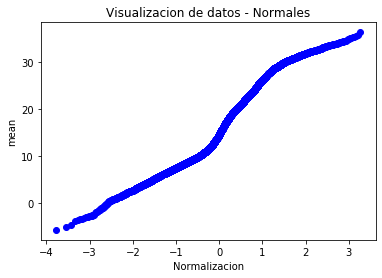

In [38]:
stats.probplot( Data_visual.iloc[: , 5],dist="norm", plot=pylab)
plt.title('Visualizacion de datos - Normales')
plt.xlabel('Normalizacion')
plt.ylabel('mean')
pylab.show()

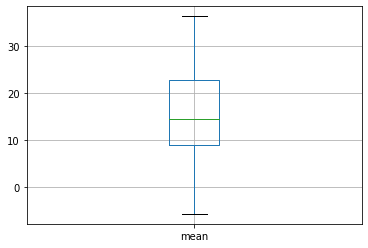

In [39]:

boxplot = Data_visual.boxplot(column=['mean'])  

In [40]:
Df_date = Df_final

In [41]:
Df_date

,provincia,municipio,ano,mes,dia,mean
2,28,102,2022,1,1,10.712500
9,28,120,2022,1,1,10.420833
16,28,123,2022,1,1,10.375000
23,28,13,2022,1,1,6.920833
30,28,133,2022,1,1,8.162500
...,...,...,...,...,...,...
61273,28,7,2022,12,31,10.287500
61280,28,74,2022,12,31,8.670833
61287,28,80,2022,12,31,8.320833
61294,28,9,2022,12,31,8.066667


In [42]:
Df_date.dtypes

provincia      int64
municipio      int64
ano            int64
mes            int64
dia            int64
mean         float64
dtype: object

In [43]:
Df_date['date'] = Df_date['ano'].astype(str)+"-"+Df_date['mes'].astype(str)+"-"+Df_date['dia'].astype(str)

In [44]:
Df_date

,provincia,municipio,ano,mes,dia,mean,date
2,28,102,2022,1,1,10.712500,2022-1-1
9,28,120,2022,1,1,10.420833,2022-1-1
16,28,123,2022,1,1,10.375000,2022-1-1
23,28,13,2022,1,1,6.920833,2022-1-1
30,28,133,2022,1,1,8.162500,2022-1-1
...,...,...,...,...,...,...,...
61273,28,7,2022,12,31,10.287500,2022-12-31
61280,28,74,2022,12,31,8.670833,2022-12-31
61287,28,80,2022,12,31,8.320833,2022-12-31
61294,28,9,2022,12,31,8.066667,2022-12-31


In [45]:
Df_date['date']=   pd.to_datetime(Df_date['date'])

In [46]:
Df_date

,provincia,municipio,ano,mes,dia,mean,date
2,28,102,2022,1,1,10.712500,2022-01-01
9,28,120,2022,1,1,10.420833,2022-01-01
16,28,123,2022,1,1,10.375000,2022-01-01
23,28,13,2022,1,1,6.920833,2022-01-01
30,28,133,2022,1,1,8.162500,2022-01-01
...,...,...,...,...,...,...,...
61273,28,7,2022,12,31,10.287500,2022-12-31
61280,28,74,2022,12,31,8.670833,2022-12-31
61287,28,80,2022,12,31,8.320833,2022-12-31
61294,28,9,2022,12,31,8.066667,2022-12-31


In [47]:
selectGetafe = Df_date['municipio'] == 65

In [48]:
Df_getafe = Df_date[selectGetafe]

In [49]:
Df_getafe.tail()

,provincia,municipio,ano,mes,dia,mean,date
60587,28,65,2022,12,27,9.100000,2022-12-27
60755,28,65,2022,12,28,8.475000,2022-12-28
60923,28,65,2022,12,29,9.941667,2022-12-29
61091,28,65,2022,12,30,11.283333,2022-12-30
61259,28,65,2022,12,31,8.562500,2022-12-31


In [50]:
Df_Getafe_f = Df_getafe.iloc[:,[5,6]]

In [93]:
Df_Getafe_f.tail ()

,mean
date,
2022-12-27,9.100000
2022-12-28,8.475000
2022-12-29,9.941667
2022-12-30,11.283333
2022-12-31,8.562500


None


In [97]:
Df_Getafe_f.index = pd.to_datetime(Df_Getafe_f.index)   
Df_Getafe_f.set_index(Df_Getafe_f.index,inplace=True)

In [98]:
Df_Getafe_f.tail()

,mean
date,
2022-12-27,9.100000
2022-12-28,8.475000
2022-12-29,9.941667
2022-12-30,11.283333
2022-12-31,8.562500


In [120]:
Df_Getafe_f.index = pd.to_datetime(Df_Getafe_f.index)

In [142]:
Df_Getafe_f.index.freq = 'd'

In [143]:
Df_Getafe_f.index

DatetimeIndex(['2022-01-01', '2022-01-02', '2022-01-03', '2022-01-04',
               '2022-01-05', '2022-01-06', '2022-01-07', '2022-01-08',
               '2022-01-09', '2022-01-10',
               ...
               '2022-12-22', '2022-12-23', '2022-12-24', '2022-12-25',
               '2022-12-26', '2022-12-27', '2022-12-28', '2022-12-29',
               '2022-12-30', '2022-12-31'],
              dtype='datetime64[ns]', name='date', length=365, freq='D')

In [140]:
pd.date_range(start = '2022-01-01', end = '2022-12-31' ).difference(Df_Getafe_f.index)

DatetimeIndex([], dtype='datetime64[ns]', freq='D')

C:\Users\franc\Anaconda3\lib\site-packages\matplotlib\cbook\__init__.py:1402: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x[:, None]
C:\Users\franc\Anaconda3\lib\site-packages\matplotlib\cbook\__init__.py:1402: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x[:, None]
C:\Users\franc\Anaconda3\lib\site-packages\matplotlib\axes\_base.py:276: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x = x[:, np.newaxis]
C:\Users\franc\Anaconda3\lib\site-packages\matplotlib\axes\_base.py:278: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be r

<function matplotlib.pyplot.plot(*args, scalex=True, scaley=True, data=None, **kwargs)>

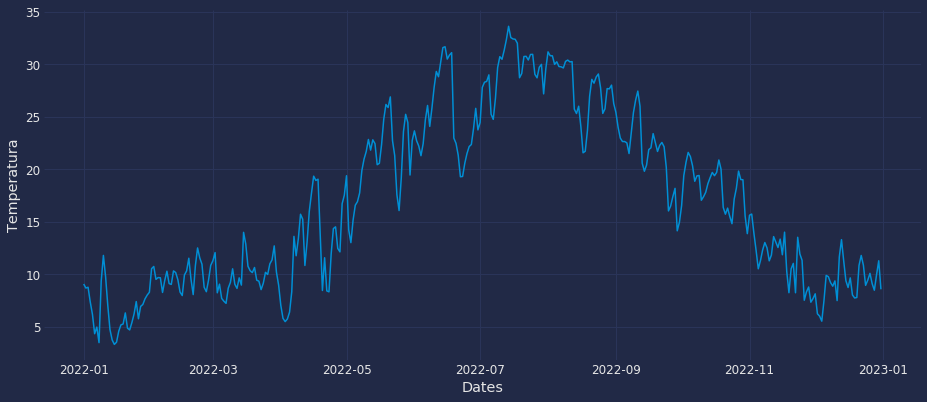

In [144]:
plt.figure(figsize=(14,6))
plt.plot(Df_Getafe_f.index,Df_Getafe_f['mean'],linestyle ='-')
plt.xlabel('Dates')
plt.ylabel('Temperatura')
plt.plot

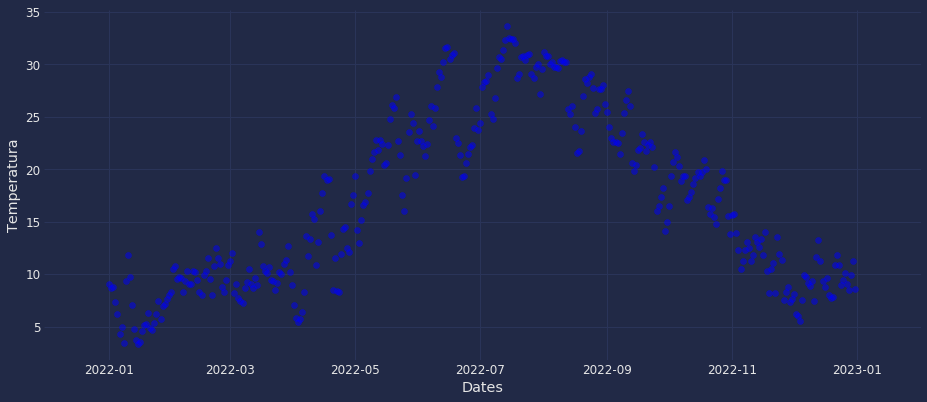

In [145]:
plt.figure(figsize=(14,6))
plt.xlabel('Dates')
plt.ylabel('Temperatura')
plt.scatter(Df_Getafe_f.index,Df_Getafe_f['mean'], c ="blue" , alpha=0.5 ) 
# To show the plot
plt.show()

In [146]:
from lightgbm import LGBMRegressor
from skforecast.ForecasterAutoreg import ForecasterAutoreg
from skforecast.model_selection import grid_search_forecaster
from skforecast.model_selection import backtesting_forecaster

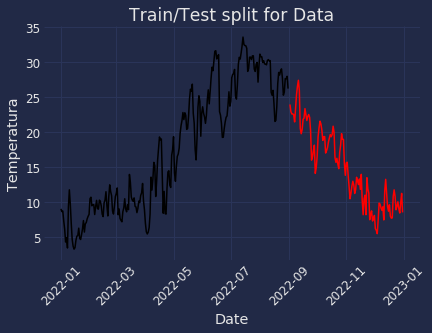

In [147]:
train = Df_Getafe_f[Df_Getafe_f.index < "2022-09-01"]
test = Df_Getafe_f[Df_Getafe_f.index > "2022-09-01"]

plt.plot(train, color = "black")
plt.plot(test, color = "red")
plt.ylabel('Temperatura')
plt.xlabel('Date')
plt.xticks(rotation=45)
plt.title("Train/Test split for Data")
plt.show()

In [148]:

from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.arima_model import ARIMA
from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()

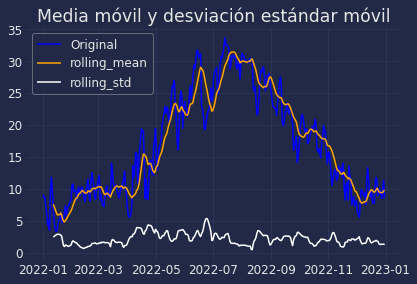

In [149]:
rolling_mean = Df_Getafe_f.rolling(window  = 12).mean() 
rolling_std = Df_Getafe_f.rolling(window  = 12).std()
plt.plot(Df_Getafe_f, color = 'blue', label = 'Original') 
plt.plot(rolling_mean, color = 'orange', label = 'rolling_mean') 
plt.plot(rolling_std, color = 'white', label = 'rolling_std') 
plt.legend(loc = 'best') 
plt.title('Media móvil y desviación estándar móvil') 
plt.show()

In [150]:
result = adfuller(Df_Getafe_f['mean'])
print('ADF Statistic: {}'.format(result[0]))
print('p-value: {}'.format(result[1]))
print('Critical Values:')
for key, value in result[4].items():
    print('\t{}: {}'.format(key, value))

ADF Statistic: -1.5296841238934655
p-value: 0.5187792798552028
Critical Values:
	1%: -3.448748905151901
	5%: -2.8696473721448728
	10%: -2.5710891239349585


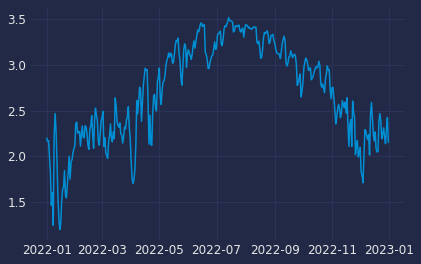

In [151]:
df_log = np.log(Df_Getafe_f) 
plt.plot(df_log)

In [152]:
def get_stationarity(timeseries):
    
    # rolling statistics
    rolling_mean = timeseries.rolling(window=12).mean()
    rolling_std = timeseries.rolling(window=12).std()
    
    # rolling statistics plot
    original = plt.plot(timeseries, color='blue', label='Original')
    mean = plt.plot(rolling_mean, color='orange', label='Rolling Mean')
    std = plt.plot(rolling_std, color='white', label='Rolling Std')
    plt.legend(loc='best')
    plt.title('Rolling Mean & Standard Deviation')
    plt.show(block=False)
    
    # Dickey–Fuller test:
    result = adfuller(timeseries['mean'])
    print('ADF Statistic: {}'.format(result[0]))
    print('p-value: {}'.format(result[1]))
    print('Critical Values:')
    for key, value in result[4].items():
        print('\t{}: {}'.format(key, value))

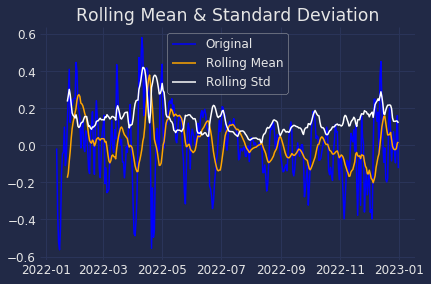

ADF Statistic: -7.8631005298493255
p-value: 5.220388859930305e-12
Critical Values:
	1%: -3.4490648539347544
	5%: -2.8697861692116478
	10%: -2.5711631253228306


In [153]:
rolling_mean = df_log.rolling(window=12).mean()
df_log_minus_mean = df_log - rolling_mean
df_log_minus_mean.dropna(inplace=True)
get_stationarity(df_log_minus_mean)

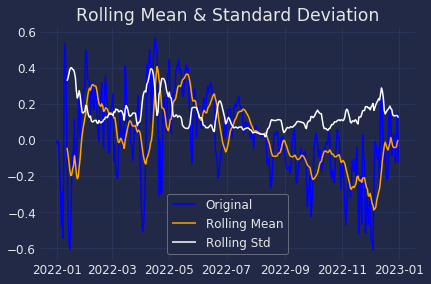

ADF Statistic: -6.01319110970947
p-value: 1.555769894744454e-07
Critical Values:
	1%: -3.448544133483233
	5%: -2.8695574079525565
	10%: -2.5710411593052713


In [154]:
rolling_mean_exp_decay = df_log.ewm(halflife=12, min_periods=0, adjust=True).mean() 
df_log_exp_decay = df_log - rolling_mean_exp_decay 
df_log_exp_decay.dropna(inplace=True)
get_stationarity(df_log_exp_decay)

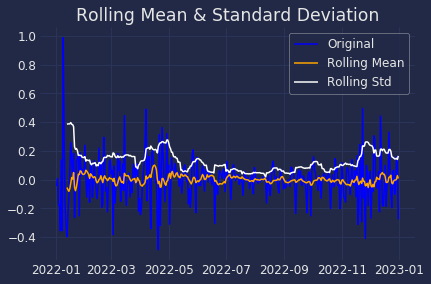

ADF Statistic: -11.735362949344143
p-value: 1.3116747714556852e-21
Critical Values:
	1%: -3.448748905151901
	5%: -2.8696473721448728
	10%: -2.5710891239349585


In [155]:
df_log_shift = df_log - df_log.shift() 
df_log_shift.dropna(inplace=True)
get_stationarity(df_log_shift)

In [182]:
data = Df_Getafe_f.loc['2022-01-01': '2022-12-31']
end_train = '2022-05-01'
end_validation = '2022-10-01'
data_train = data.loc[: end_train, :].copy()
data_val   = data.loc[end_train:end_validation, :].copy()
data_test  = data.loc[end_validation:, :].copy()

In [183]:

print(f"Fechas entrenamiento : {data_train.index.min()} --- {data_train.index.max()}  (n={len(data_train)})")
print(f"Fechas validación    : {data_val.index.min()} --- {data_val.index.max()}  (n={len(data_val)})")
print(f"Fechas test          : {data_test.index.min()} --- {data_test.index.max()}  (n={len(data_test)})")

Fechas entrenamiento : 2022-01-01 00:00:00 --- 2022-05-01 00:00:00  (n=121)
Fechas validación    : 2022-05-01 00:00:00 --- 2022-10-01 00:00:00  (n=154)
Fechas test          : 2022-10-01 00:00:00 --- 2022-12-31 00:00:00  (n=92)


In [184]:
# Plots
# ==============================================================================
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
from statsmodels.graphics.tsaplots import plot_acf
import plotly.express as px
import plotly.graph_objects as go
plt.style.use('fivethirtyeight')
plt.rcParams['lines.linewidth'] = 1.5
dark_style = {
    'figure.facecolor'  : '#212946',
    'axes.facecolor'    : '#212946',
    'savefig.facecolor' : '#212946',
    'axes.grid'         : True,
    'axes.grid.which'   : 'both',
    'axes.spines.left'  : False,
    'axes.spines.right' : False,
    'axes.spines.top'   : False,
    'axes.spines.bottom': False,
    'grid.color'        : '#2A3459',
    'grid.linewidth'    : '1',
    'text.color'        : '0.9',
    'axes.labelcolor'   : '0.9',
    'xtick.color'       : '0.9',
    'ytick.color'       : '0.9',
    'font.size'         : 12
}
plt.rcParams.update(dark_style)

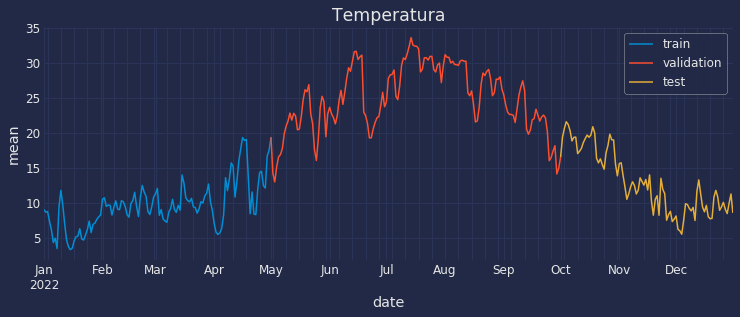

In [185]:
# Gráfico de la serie temporal
# ==============================================================================
fig, ax=plt.subplots(figsize=(11, 4))
data_train['mean'].plot(label='train', ax=ax)
data_val['mean'].plot(label='validation', ax=ax)
data_test['mean'].plot(label='test', ax=ax)
ax.yaxis.set_major_formatter(ticker.EngFormatter())
ax.set_ylim()
ax.set_ylabel('mean')
ax.set_title('Temperatura')
ax.legend();

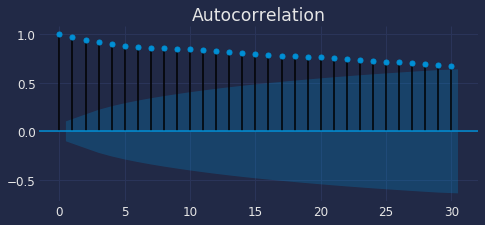

In [186]:
# Gráfico de autocorrelación
# ==============================================================================
fig, ax = plt.subplots(figsize=(7, 3))
plot_acf(Df_Getafe_f['mean'], ax=ax, lags=30)
plt.show()

In [187]:
# Crear forecaster
# ==============================================================================
forecaster = ForecasterAutoreg(
                 regressor     = LGBMRegressor(random_state=123),
                 lags          = 7
             )
forecaster

ForecasterAutoreg 
Regressor: LGBMRegressor(random_state=123) 
Lags: [1 2 3 4 5 6 7] 
Transformer for y: None 
Transformer for exog: None 
Window size: 7 
Weight function included: False 
Exogenous included: False 
Type of exogenous variable: None 
Exogenous variables names: None 
Training range: None 
Training index type: None 
Training index frequency: None 
Regressor parameters: {'boosting_type': 'gbdt', 'class_weight': None, 'colsample_bytree': 1.0, 'importance_type': 'split', 'learning_rate': 0.1, 'max_depth': -1, 'min_child_samples': 20, 'min_child_weight': 0.001, 'min_split_gain': 0.0, 'n_estimators': 100, 'n_jobs': -1, 'num_leaves': 31, 'objective': None, 'random_state': 123, 'reg_alpha': 0.0, 'reg_lambda': 0.0, 'silent': 'warn', 'subsample': 1.0, 'subsample_for_bin': 200000, 'subsample_freq': 0} 
Creation date: 2023-01-06 18:50:07 
Last fit date: None 
Skforecast version: 0.6.0 
Python version: 3.7.4 

In [214]:
# Grid search de hyper-parámetros y lags
# ==============================================================================
# Hyper-parámetros del regresor
param_grid = {
    'n_estimators': [100, 500, 600],
    'max_depth': [3, 5, 10 , 25 ],
    'learning_rate': [0.01, 0.1,0.005]
}

# Lags utilizados como predictores
lags_grid = [7]

results_grid_q10 = grid_search_forecaster(
                       forecaster         = forecaster,
                       y                  = data.loc[:end_validation, 'mean'],
                       param_grid         = param_grid,
                       lags_grid          = lags_grid,
                       steps              = 7,
                       refit              = True,
                       metric             = 'mean_squared_error',
                       initial_train_size = int(len(data_train)),
                       fixed_train_size   = False,
                       return_best        = True,
                       verbose            = False
                   )


Number of models compared: 36.


loop lags_grid: 100%|███████████████████████████████████████| 1/1 [00:37<00:00, 37.28s/it]

`Forecaster` refitted using the best-found lags and parameters, and the whole data set: 
  Lags: [1 2 3 4 5 6 7] 
  Parameters: {'learning_rate': 0.01, 'max_depth': 5, 'n_estimators': 500}
  Backtesting metric: 15.844389842001764



In [215]:
# Backtesting
# ==============================================================================
metric, predictions = backtesting_forecaster(
                          forecaster         = forecaster,
                          y                  = data['mean'],
                          initial_train_size = len(data_train) + len(data_val),
                          fixed_train_size   = False,
                          steps              = 7,
                          refit              = True,
                          interval           = [10, 90],
                          n_boot             = 1000,
                          metric             = 'mean_squared_error',
                          verbose            = False
                      )

predictions.head(4)

,pred,lower_bound,upper_bound
2022-10-03,17.864440,16.248469,19.403765
2022-10-04,17.764878,15.346436,19.878321
2022-10-05,18.074074,15.217574,20.705970
2022-10-06,18.128614,15.086980,21.526031


In [194]:
# Cobertura del intervalo en los datos de test
# ==============================================================================
inside_interval = np.where(
                      (data.loc[predictions.index, 'mean'] >= predictions['lower_bound']) & \
                      (data.loc[predictions.index, 'mean'] <= predictions['upper_bound']),
                      True,
                      False
                  )

coverage = inside_interval.mean()
print(f"Cobertura del intervalo predicho con los datos de test: {100 * coverage}")

Cobertura del intervalo predicho con los datos de test: 73.33333333333333


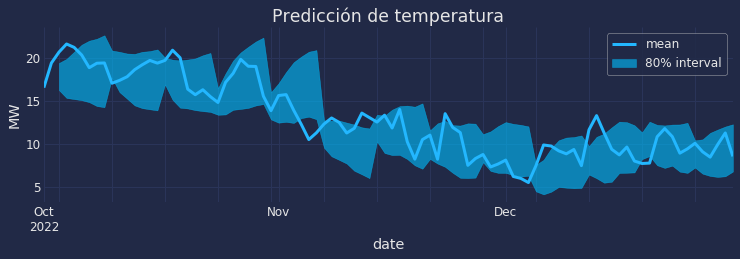

In [217]:
# Gráfico
# ==============================================================================
fig, ax=plt.subplots(figsize=(11, 3))
data.loc[end_validation:, 'mean'].plot(ax=ax, label='mean', linewidth=3, color="#23b7ff")
ax.fill_between(
    predictions.index,
    predictions['lower_bound'],
    predictions['upper_bound'],
    color = 'deepskyblue',
    alpha = 0.6,
    label = '80% interval'
)
ax.yaxis.set_major_formatter(ticker.EngFormatter())
ax.set_ylabel('MW')
ax.set_title('Predicción de temperatura')
ax.legend();

In [221]:
# Predict
# ==============================================================================
forecaster.predict(steps=10)

2022-10-02    18.038649
2022-10-03    17.372305
2022-10-04    18.007044
2022-10-05    18.330514
2022-10-06    17.938136
2022-10-07    17.646041
2022-10-08    17.879398
2022-10-09    17.695112
2022-10-10    17.591882
2022-10-11    17.749271
Freq: D, Name: pred, dtype: float64

In [225]:

forecaster.fit(y=data.loc[:end_validation,'mean'])
forecaster.predict(steps=93)

2022-10-02    18.038649
2022-10-03    17.372305
2022-10-04    18.007044
2022-10-05    18.330514
2022-10-06    17.938136
                ...    
2022-12-29    17.982627
2022-12-30    17.591882
2022-12-31    17.646041
2023-01-01    17.982627
2023-01-02    17.695112
Freq: D, Name: pred, Length: 93, dtype: float64

In [224]:
data_test

,mean
date,
2022-10-01,16.541667
2022-10-02,19.400000
2022-10-03,20.662500
2022-10-04,21.608333
2022-10-05,21.216667
...,...
2022-12-27,9.100000
2022-12-28,8.475000
2022-12-29,9.941667
